In [268]:
import pandas as pd
import numpy as np
import re
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import collections
from wordcloud import WordCloud

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [209]:
df = pd.read_csv('/content/Restaurant_Reviews.tsv (1)',delimiter='\t', quoting=3)

In [210]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [212]:
df.shape

(1000, 2)

In [213]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [214]:
type(df)

pandas.core.frame.DataFrame

In [215]:
df.dtypes

Review    object
Liked      int64
dtype: object

In [216]:
df.isna().sum()

Review    0
Liked     0
dtype: int64

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [218]:
df.nunique()

Review    996
Liked       2
dtype: int64

In [219]:
df.dropna(inplace = True)

# **Data Cleaning:-**

In [220]:
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove special characters and make it lower case
    text = re.sub(r'[^a-zA-ZÀ-ú\s]', '', text.lower())
    # Tokenization
    tokens = text.split()
    # Remove numbers
    tokens = [token for token in tokens if not token.isdigit()]
    # Remove punctuation
    tokens = [re.sub(r'[^\w\s]', '', token) for token in tokens]
    # Remove extra whitespace
    tokens = [token.strip() for token in tokens]
    # Remove two letter words
    tokens = [token for token in tokens if len(token) > 2]
    # Join the tokens back into a single text
    cleaned_text = ' '.join(tokens)
    return cleaned_text

In [221]:
df['clean_text'] = [clean_text(text) for text in df['Review']]
df.head()

,Review,Liked,clean_text
0,Wow... Loved this place.,1,wow loved this place
1,Crust is not good.,0,crust not good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stopped during the late may bank holiday off r...
4,The selection on the menu was great and so wer...,1,the selection the menu was great and were the ...


In [222]:
corpus = []
ps = PorterStemmer()

for i in range(0,df.shape[0]):
    message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df.Review[i]) #Cleaning special character from the message
    message = message.lower() #Converting the entire message into lower case
    words = message.split() # Tokenizing the review by words
    words = [word for word in words if word not in set(stopwords.words('english'))] #Removing the stop words
    words = [ps.stem(word) for word in words] #Stemming the words
    message = ' '.join(words) #Joining the stemmed words
    corpus.append(message) #Building a corpus of messages

In [223]:
corpus[0:10]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch']

# **Data Visualization:-**

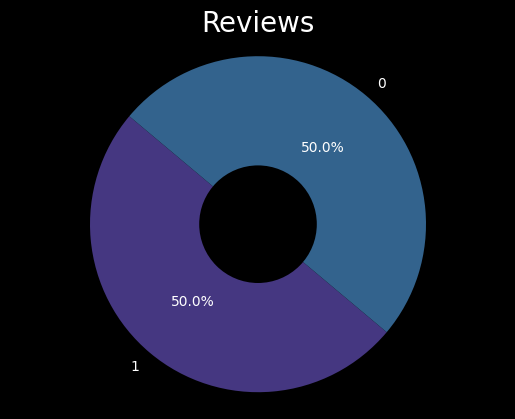

In [224]:
ratings = df['Liked'].value_counts()

labels = ratings.index
sizes = ratings.values
colors = ['#453781', '#33638D', '#238A8D', '#29AF7F', '#73D055']

plt.pie(sizes, labels = labels, colors = colors, autopct = '%1.1f%%', startangle = 140)

centre_circle = plt.Circle((0, 0), 0.35, fc = 'black')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Reviews', fontsize = 20)

plt.axis('equal')
plt.show()


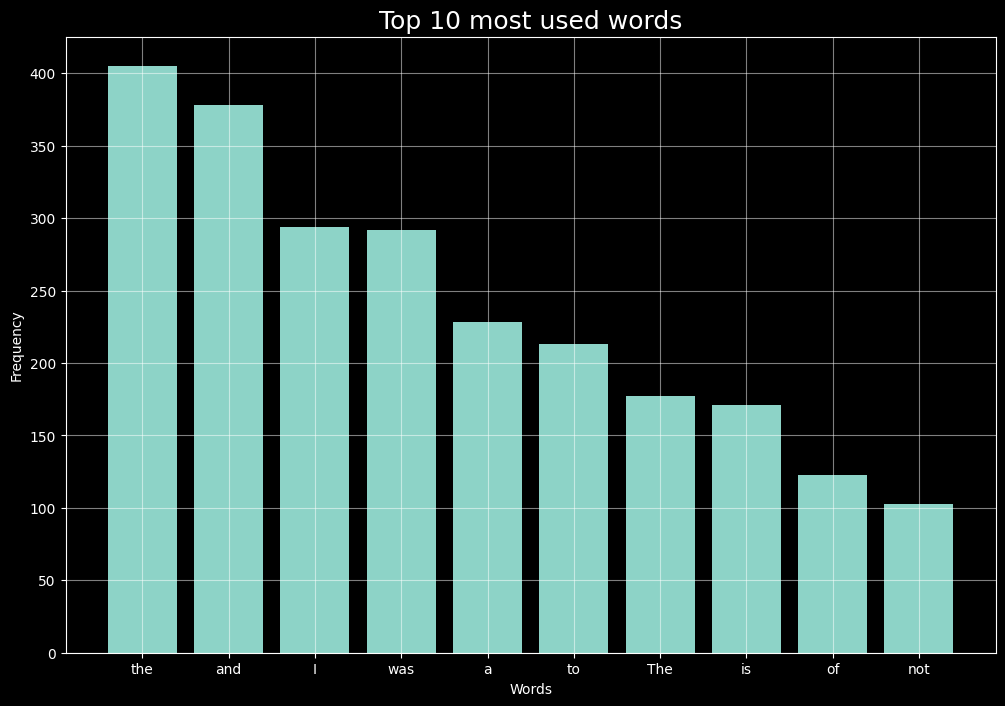

In [225]:
words = []
for text in df['Review']:
    words.extend(text.split())
word_count = collections.Counter(words)
top_words = dict(word_count.most_common(10))

# Dark Background and figure size
plt.style.use('dark_background')
plt.figure(figsize = (12, 8))

# Create the Barplot
plt.bar(range(len(top_words)), list(top_words.values()), align = 'center')

plt.xticks(range(len(top_words)), list(top_words.keys()))
# Grid Opacity
plt.grid(alpha = 0.5)
# Title
plt.title('Top 10 most used words', fontsize = 18)
# Labels
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.show()

<Figure size 1200x800 with 0 Axes>

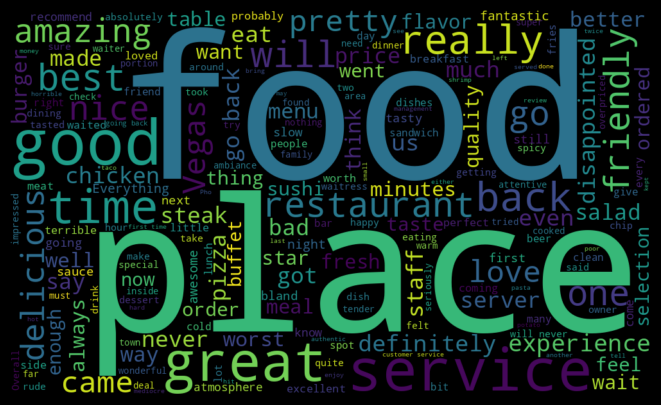

In [226]:
all_text = ' '.join(df['Review'])

# Dark Background and figure size
plt.style.use('dark_background')
plt.figure(figsize = (12, 8))

# Create the WordCloud object
wordcloud = WordCloud(width = 1000, height = 600, background_color = 'black').generate(all_text)

# Plot the wordcloud
plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# **What Most People Say About 1 Rating Review**

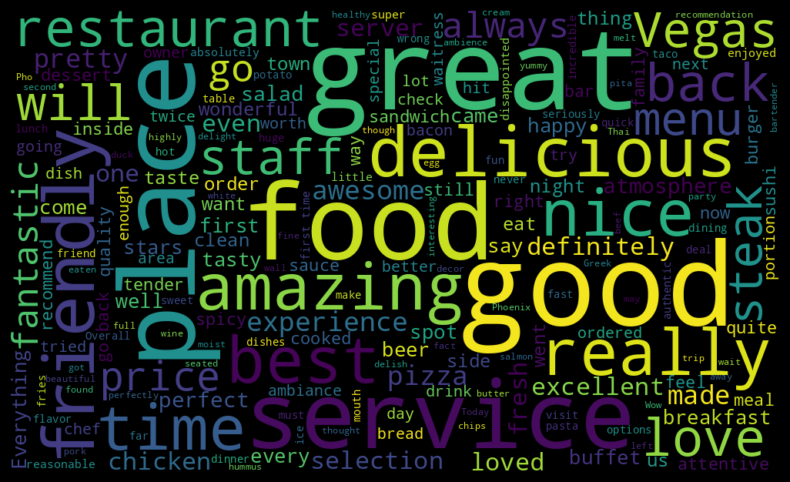

In [227]:
texts_rating_1 = df[df['Liked'] == 1]['Review']

# Juntar os textos em uma única string
full_text = ' '.join(texts_rating_1)

# Criar a nuvem de palavras
wordcloud = WordCloud(width = 1000, height = 600, max_font_size = 150, background_color = 'black').generate(full_text)

# Plotar a nuvem de palavras
plt.figure(figsize = (10, 6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# **What Most People Say About 0 Rating Review**

(-0.5, 999.5, 599.5, -0.5)

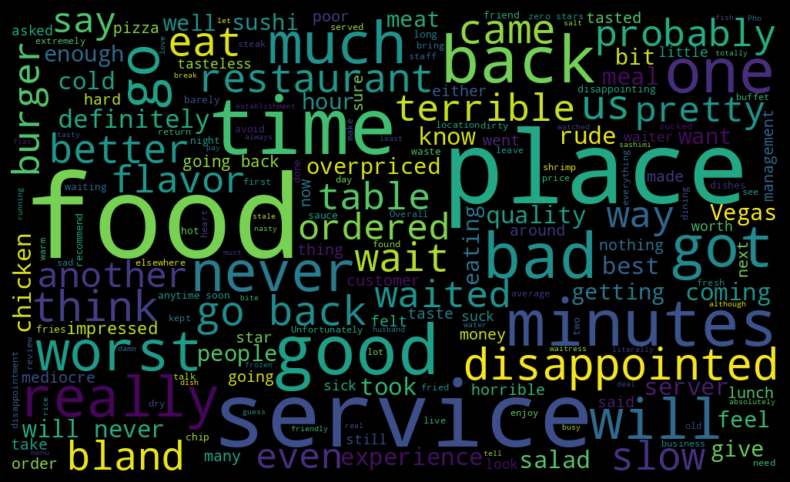

In [228]:
texts_rating_1 = df[df['Liked'] == 0]['Review']

# Juntar os textos em uma única string
full_text = ' '.join(texts_rating_1)

# Criar a nuvem de palavras
wordcloud = WordCloud(width = 1000, height = 600, max_font_size = 150, background_color = 'black').generate(full_text)

# Plotar a nuvem de palavras
plt.figure(figsize = (10, 6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

# **🧮 Data Processing**

In [229]:
import nltk  # for stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
all_stopwords = stopwords.words('english')
print (all_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [230]:
import re
import nltk  # for stop words
nltk.download('stopwords') # importing all stopwords
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer # For applying steming in the dataset , to get the root of the word
corpus = [] # create a list to store all cleaned words
for i in range(0, 1000):
  # dataset['Review'][i] - source data to prcess - i th record in the data
  review = re.sub('[^a-zA-Z]', ' ', df['Review'][i]) # Replace punctuations with space, other than letters replace with space
  review = review.lower()
  review = review.split() # split into different words
  ps = PorterStemmer()  # get root words
  all_stopwords = stopwords.words('english') # get english stop words
  all_stopwords.remove('not') # Remove “not” from stop words
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [231]:
corpus

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would not go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place not worth time let alon vega',
 'not like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow

In [232]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer() # 1500 is decided by statement len(X[0]). Fist execute without max features
X = cv.fit_transform(corpus).toarray()
len(X[0])

1566

In [233]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500) # 1500 is decided by statement len(X[0]). Fist execute without max features
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, -1].values # this is dependent variable
print(len(X[0])) # this gives me the max_features count
print (X)
print (y)

1500
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['wow loved this place' 'crust not good'
 'not tasty and the texture was just nasty'
 'stopped during the late may bank holiday off rick steve recommendation and loved'
 'the selection the menu was great and were the prices'
 'now getting angry and want damn pho' 'honeslty didnt taste that fresh'
 'the potatoes were like rubber and you could tell they had been made ahead time being kept under warmer'
 'the fries were great too' 'great touch' 'service was very prompt'
 'would not back'
 'the cashier had care what ever what had say still ended being wayyy overpriced'
 'tried the cape cod ravoli chicken with cranberrymmmm'
 'was disgusted because was pretty sure that was human hair'
 'was shocked because signs indicate cash only' 'highly recommended'
 'waitress was little slow service'
 'this place not worth your time let alone vegas' 'did not like all'
 'the burrit

In [234]:
X.shape

(1000, 1500)

# **Decision Tree Model**

In [235]:
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values

In [236]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [237]:
print (X.shape)
print (X_train.shape)
print (X_test.shape)

(1000, 1500)
(800, 1500)
(200, 1500)


In [238]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.996
Accuracy on test set: 0.735


In [240]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.661
Accuracy on test set: 0.600


# **MultinomialNB Model**

In [244]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


In [245]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train,y_train)


MultinomialNB(alpha=0.1)

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [247]:
y_pred = classifier.predict(X_test)

y_pred


array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1])

In [248]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Confusion Matrix:
 [[74 23]
 [20 83]]


Accuracy is  78.5 %
Precision is  0.78
Recall is  0.81


Confusion Matrix:
 [[74 23]
 [20 83]]


Text(83.22222222222221, 0.5, 'Actual')

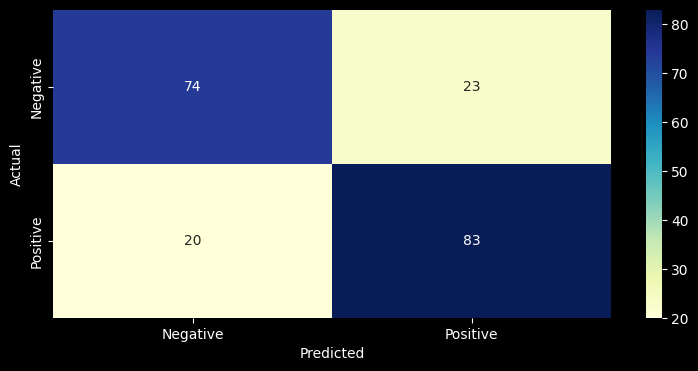

In [249]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print("Confusion Matrix:\n", cm)

plt.figure(figsize=(9, 4))
sns.heatmap(cm, annot=True,cmap="YlGnBu",
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [250]:
best_accuracy =0.0
alpha_val=0.0
for i in np.arange(0.1,1.1,0.1):
    temp_classifier=MultinomialNB(alpha=i)
    temp_classifier.fit(X_train,y_train)
    temp_y_pred=temp_classifier.predict(X_test)
    score=accuracy_score(y_test,temp_y_pred)
    print("Accuracy score for alpha={} is : {}%".format(round(i,1),round(score*100,2)))
    if score>best_accuracy:
        best_accuracy=score
        alpha_val=i
print("------------------------------------------------------------------")
print("The best accuracy is {}% with alpha value as {}".format(round(best_accuracy*100,2),round(alpha_val,1)))

Accuracy score for alpha=0.1 is : 78.5%
Accuracy score for alpha=0.2 is : 79.0%
Accuracy score for alpha=0.3 is : 78.5%
Accuracy score for alpha=0.4 is : 78.5%
Accuracy score for alpha=0.5 is : 78.0%
Accuracy score for alpha=0.6 is : 78.0%
Accuracy score for alpha=0.7 is : 78.5%
Accuracy score for alpha=0.8 is : 78.0%
Accuracy score for alpha=0.9 is : 78.0%
Accuracy score for alpha=1.0 is : 77.5%
------------------------------------------------------------------
The best accuracy is 79.0% with alpha value as 0.2


In [251]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [252]:
y_pred = classifier.predict(X_test)

In [253]:
acc_s = accuracy_score(y_test, y_pred)*100

In [254]:
print("Accuracy Score {} %".format(round(acc_s,2)))

Accuracy Score 78.5 %


# **Random Forest Classifier Model**

In [255]:
#build forest
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

#print trian, test accuracy
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.996
Accuracy on test set: 0.775


# **Gradient Boosting Classifier Model**

In [256]:
#build gradient boost
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

#calc accuracy
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.853
Accuracy on test set: 0.735


# **Logistic Regression Model**

In [257]:
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#pipe = Pipeline([("scaler", StandardScaler()), ("model", RandomForestClassifier())])
pipe = Pipeline([("scaler", StandardScaler()), ("model", LogisticRegression())])

In [258]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])

In [259]:
prediction = pipe.predict(X_test)

In [260]:
from sklearn.metrics import log_loss, accuracy_score

score = accuracy_score(y_test, prediction)
print("Accuracy on validation set: ",score)

Accuracy on validation set:  0.8


# **Predictions**

In [241]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)


In [264]:
sample_review = 'The food is really good here.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a POSITIVE review.


In [265]:
sample_review = 'Food was pretty bad and the service was very slow.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a NEGATIVE review!


In [266]:
sample_review = 'Food was very good'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a POSITIVE review.


In [267]:
sample_review = 'Food was very baddd'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a NEGATIVE review!
